In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [13]:
df = pd.read_csv('master.csv')
population = df['population']
gdp_per_year = df['gdp_per_year($)'].map(lambda x:int(x.replace(',','')))

Correlation describes whether a relationship between an independent variable $x$, and a dependent variable $y$ exists. Let's looking at the dataset below. How do we know whether the population has an impact on the GDP per year?

### Dataset - Suicide Rates Overview 1985 to 2016
https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016

In [14]:
df[['population','gdp_per_year($)']]

,population,gdp_per_year($)
0,312900,"2,156,624,900"
1,308000,"2,156,624,900"
2,289700,"2,156,624,900"
3,21800,"2,156,624,900"
4,274300,"2,156,624,900"
...,...,...
27815,3620833,"63,067,077,179"
27816,348465,"63,067,077,179"
27817,2762158,"63,067,077,179"
27818,2631600,"63,067,077,179"


To see whether there is a correlation between population and GDP, we need to calculate the _Pearson's correlation coefficient_, or _Pearson's R_. The Pearson's R value tells us the correlation strength between two variables. To calculate the Pearson's R, we can use the following formula:

$$r = \frac{\sum(Z_xZ_y)}{N - 1}$$

where:
$$Z_x = \text{ Z-Score for X}$$
$$Z_y = \text{ Z-Score for Y}$$
$$N = \text{Number of data points}$$

In [16]:
x = population
y = gdp_per_year
N = len(df)

# Calculate Z-Scores
zx = (x - x.mean()) / x.std()
zy = (y - y.mean()) / y.std()

# Pearson's R
r = sum(zx * zy) / (N - 1)
print(f"Pearson's R: {r}")

Pearson's R: 0.7106973227934138


We can interpret the relationship between population and GDP with the following table. As the R value calculated is approximately 0.71, we can conclude that the population has an impact on the GDP per year.

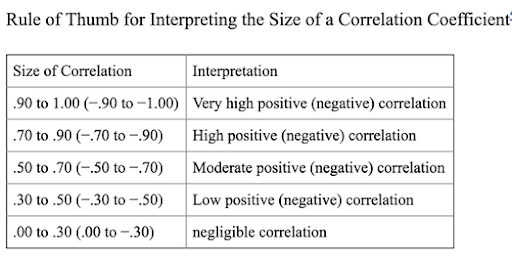

_Source: Hinkle DE, Wiersma W, Jurs SG. Applied Statistics for the Behavioral Sciences. 5th ed. Boston: Houghton Mifflin; 2003_

Do take note that correlation is **not** the same thing as causation. 

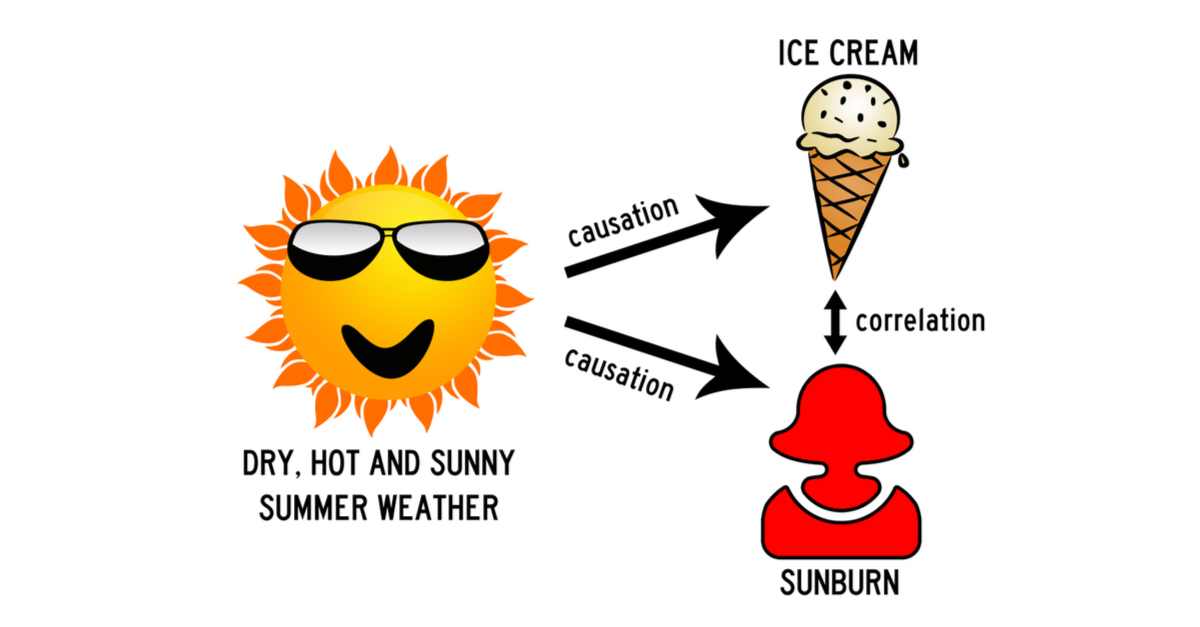
_[Image source](https://towardsdatascience.com/correlation-is-not-causation-ae05d03c1f53)_

Just because there is a correlation between sunburn and eating ice-cream, that does not imply that sunburn is the reason for more consumption of ice-cream, or vice-versa. However, the dry and hot weather causes increased rate of sunburn and more consumption of ice-cream.

In this image, _sunburn_ and _eating ice-cream_ are _spuriously related_. Which means that they are associated with each other but **not** causally related due to either coincidence or the presence of a unseen factor, known as the _confounder variable_. In this case, the confounder variable is the _hot weather_. It influences both the dependent and independent variable, causing a spurious relationship. It is a causal concept and cannot be described in terms of correlations or associations.

If the confounder variable is not included in the study, it is known as a _lurking variable_. A lurking variable can falsely identify a strong relationship between variables or it can hide the true relationship. For example, a research scientist studies the effect of diet and exercise on a person's blood pressure. Lurking variables that also affect blood pressure are whether a person smokes and stress levels.

[Source](https://support.minitab.com/en-us/minitab-express/1/help-and-how-to/modeling-statistics/regression/supporting-topics/regression-models/what-is-a-lurking-variable/)